# K Mean Clustering

In [10]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

In [11]:
# Size of dataset to be generated. The final size is 4 * data_size
data_size = 1000
num_iters = 50
num_clusters = 4

# sample from Gaussians 
data1 = np.random.normal((5, 5, 5), (4, 4, 4), (data_size, 3))
data2 = np.random.normal((4, 20, 20), (3, 3, 3), (data_size, 3))
data3 = np.random.normal((25, 20, 5), (5, 5, 5), (data_size, 3))
data4 = np.random.normal((30, 30, 30), (5, 5, 5), (data_size, 3))

# Combine the data to create the final dataset
data = np.concatenate((data1,data2, data3, data4), axis = 0)

# Shuffle the data
np.random.shuffle(data)

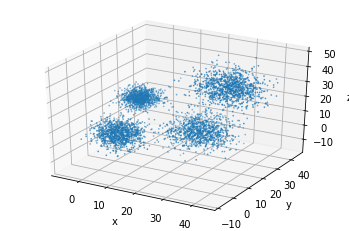

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(data[:,0], data[:,1], data[:,2], s= 0.5)
plt.show()

In [13]:
# Set random seed for reproducibility 
random.seed(0)

# Initialize the list to store centroids
centroids = []

# Sample initial centroids
random_indices = random.sample(range(data.shape[0]), 4)
for i in random_indices:
    centroids.append(data[i])

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = [0] * len(data)

In [32]:
def compute_l2_distance(x, centroid):
    # Initialize the distance to 0
    dist = 0
    
    # Loop over the dimensions. Take squared difference and add to 'dist' 
    for i in range(len(x)):
        dist += (centroid[i] - x[i])**2
        
    return dist

In [34]:
def get_closest_centroid(x, centroids):
    # Initialize the list to keep distances from each centroid
    centroid_distances = []
    
    # Loop over each centroid and compute the distance from data point.
    for centroid in centroids:
        dist = compute_l2_distance(x, centroid)
        centroid_distances.append(dist)
    
    # Get the index of the centroid with the smallest distance to the data point 
    closest_centroid_index =  min(range(len(centroid_distances)), key=lambda x: centroid_distances[x])
    
    return closest_centroid_index

In [33]:
def compute_sse(data, centroids, assigned_centroids):
    # Initialise SSE 
    sse = 0
    
    # Compute the squared distance for each data point and add. 
    for i, x in enumerate(data):
        # Get the associated centroid for data point
        centroid = centroids[assigned_centroids[i]]
                
        # Compute the distance to the centroid
        dist = compute_l2_distance(x, centroid)
        
        # Add to the total distance
        sse += dist
    
    sse /= len(data)
    return sse

In [17]:
# Number of dimensions in centroid
num_centroid_dims = data.shape[1]

# List to store SSE for each iteration 
sse_list = []

tic = time.time()

# Loop over iterations
for n in range(num_iters):
    
    # Loop over each data point
    for i in range(len(data)):
        x = data[i]
        
        # Get the closest centroid
        closest_centroid = get_closest_centroid(x, centroids)
        
        # Assign the centroid to the data point.
        assigned_centroids[i] = closest_centroid
    
    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = [data[i] for i in range(len(data)) if assigned_centroids[i] == c]
    
        # Initialize the list to hold the new centroid
        new_centroid = [0] * len(centroids[0])
        
        # Compute the average of cluster members to compute new centroid
        # Loop over dimensions of data
        for dim in range(num_centroid_dims): 
            dim_sum = [x[dim] for x in cluster_data]
            dim_sum = sum(dim_sum) / len(dim_sum)
            new_centroid[dim] = dim_sum
            
        # assign the new centroid
        centroids[c] = new_centroid
        
    # Compute the SSE for the iteration
    sse = compute_sse(data, centroids, assigned_centroids)
    sse_list.append(sse)

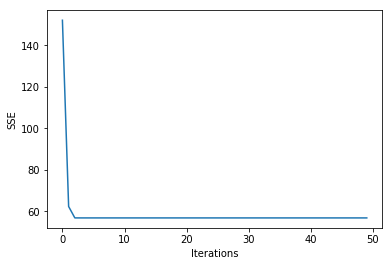

In [20]:
plt.figure()
plt.xlabel("Iterations")
plt.ylabel("SSE")
plt.plot(range(len(sse_list)), sse_list)
plt.show()

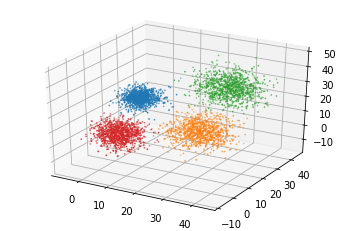

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for c in range(len(centroids)):
        cluster_members = [data[i] for i in range(len(data)) if assigned_centroids[i] == c]    
        cluster_members = np.array(cluster_members)
        
        ax.scatter(cluster_members[:,0], cluster_members[:,1], cluster_members[:,2], s= 0.5)

Vectorized

In [96]:
def compute_l2_distance(x, centroid):
    # Compute the difference, following by raising to power 2 and summing
    return ((x - centroid) ** 2).sum(axis = x.ndim - 1)

In [97]:
def get_closest_centroid(x, centroids):
    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point 
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

In [98]:
def compute_sse(data, centroids, assigned_centroids):
    # Compute SSE
    return compute_l2_distance(data, centroids[assigned_centroids]).sum() / len(data)

In [99]:
centroids = data[random.sample(range(data.shape[0]), 4)]

In [100]:
# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

In [101]:
sse_list = []
# Loop over iterations
for n in range(num_iters):
    
    # Get closest centroids to each data point
    assigned_centroids = get_closest_centroid(data[:, None, :], centroids[None,:, :]) 
    
    # Loop over centroids and compute the new ones.
    for c in range(centroids.shape[1]):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        
        # assign the new centroid
        centroids[c] = new_centroid
        
    # Compute the SSE for the iteration
    sse = compute_sse(data.squeeze(), centroids.squeeze(), assigned_centroids)
    sse_list.append(sse)

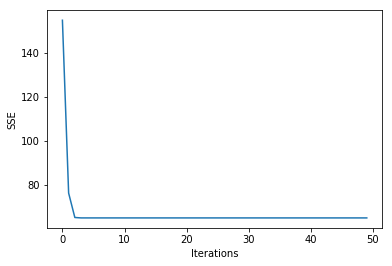

In [102]:
plt.figure()
plt.xlabel("Iterations")
plt.ylabel("SSE")
plt.plot(range(len(sse_list)), sse_list)
plt.show()

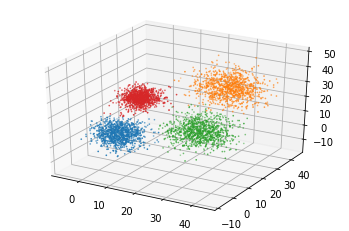

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for c in range(len(centroids)):
        cluster_members = [data[i] for i in range(len(data)) if assigned_centroids[i] == c]    
        cluster_members = np.array(cluster_members)
        
        ax.scatter(cluster_members[:,0], cluster_members[:,1], cluster_members[:,2], s= 0.5)